In [1]:
# import what we need
import pandas as pd
import numpy as np
import os
import datetime as datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# load DJIA csv into pandas_df
DJIA_df = pd.read_csv('data/DJIA_ClosingValues_1896to2020.csv', encoding='utf-8', delimiter=',', engine='python')
DJIA_df

,Date,closing value of DOW
0,1/2/1897 �,��� 29.8447
1,1/4/1897 �,��� 29.5736
2,1/5/1897 �,��� 29.9399
3,1/6/1897 �,��� 29.9985
4,1/7/1897 �,��� 29.9399
...,...,...
23450,9/18/1980 �,��� 956.48
23451,9/19/1980 �,��� 963.74
23452,9/22/1980 �,��� 974.57
23453,9/23/1980 �,��� 962.03


In [3]:
# remove unicode 'special' charachters
DJIA_df['Date'] = DJIA_df['Date'].str.replace("�", "")
DJIA_df['closing value of DOW'] = DJIA_df['closing value of DOW'].str.replace("�", "")
DJIA_df

,Date,closing value of DOW
0,1/2/1897,29.8447
1,1/4/1897,29.5736
2,1/5/1897,29.9399
3,1/6/1897,29.9985
4,1/7/1897,29.9399
...,...,...
23450,9/18/1980,956.48
23451,9/19/1980,963.74
23452,9/22/1980,974.57
23453,9/23/1980,962.03


In [4]:
# convert 'Date' column values to datetime64[ns]
DJIA_df['Date'] = pd.to_datetime(DJIA_df['Date'], infer_datetime_format=True)
DJIA_df['Date']

0       1897-01-02
1       1897-01-04
2       1897-01-05
3       1897-01-06
4       1897-01-07
           ...    
23450   1980-09-18
23451   1980-09-19
23452   1980-09-22
23453   1980-09-23
23454   1980-09-24
Name: Date, Length: 23455, dtype: datetime64[ns]

In [5]:
# convert 'closing value of DOW' column values to float64, then round every value to two decimal places
DJIA_df['closing value of DOW'] = pd.to_numeric(DJIA_df['closing value of DOW'])
DJIA_df['closing value of DOW'] = DJIA_df['closing value of DOW'].round(decimals=2)
DJIA_df['closing value of DOW']

0         29.84
1         29.57
2         29.94
3         30.00
4         29.94
          ...  
23450    956.48
23451    963.74
23452    974.57
23453    962.03
23454    964.76
Name: closing value of DOW, Length: 23455, dtype: float64

In [6]:
# simplify column name of closing values
DJIA_df = DJIA_df.rename(columns = {'closing value of DOW': 'DJIA Close'})
DJIA_df

,Date,DJIA Close
0,1897-01-02,29.84
1,1897-01-04,29.57
2,1897-01-05,29.94
3,1897-01-06,30.00
4,1897-01-07,29.94
...,...,...
23450,1980-09-18,956.48
23451,1980-09-19,963.74
23452,1980-09-22,974.57
23453,1980-09-23,962.03


In [7]:
# get earliest date record
minDate = DJIA_df['Date'].min()
# count # days on record
daysCount = DJIA_df['Date'].count()

# make date_range using the earliest date record, over the number of days on record, with the frequency = daily
DJIA_daterange = pd.date_range(start = minDate, periods = daysCount, freq='D')
DJIA_daterange

DatetimeIndex(['1897-01-02', '1897-01-03', '1897-01-04', '1897-01-05',
               '1897-01-06', '1897-01-07', '1897-01-08', '1897-01-09',
               '1897-01-10', '1897-01-11',
               ...
               '1961-03-13', '1961-03-14', '1961-03-15', '1961-03-16',
               '1961-03-17', '1961-03-18', '1961-03-19', '1961-03-20',
               '1961-03-21', '1961-03-22'],
              dtype='datetime64[ns]', length=23455, freq='D')

In [8]:
# make DJIA daily series
DJIA_dailySeries = pd.Series(data = DJIA_df['DJIA Close'].values, index = DJIA_daterange)
DJIA_dailySeries

1897-01-02     29.84
1897-01-03     29.57
1897-01-04     29.94
1897-01-05     30.00
1897-01-06     29.94
               ...  
1961-03-18    956.48
1961-03-19    963.74
1961-03-20    974.57
1961-03-21    962.03
1961-03-22    964.76
Freq: D, Length: 23455, dtype: float64

In [9]:
# put year, month, and DJIA values into their own arrays
years = []
months = []
values = []

DJIA_monthlyResample = DJIA_dailySeries.resample('M').mean()
DJIA_monthlyResample

for index, value in DJIA_monthlyResample.items():
    # print(f"Year : {index.year}")
    # print(f"Month : {index.month}")
    # print(f"Value : {value}")
    y = int(index.year)
    m = int(index.month)
    v = int(value)
    years.append(y)
    months.append(m)
    values.append(v)

In [10]:
# put it all together in df
monthlyCleanData = {'year': years, 'month': months, 'djia mean': values}
DJIA_monthlyMean = pd.DataFrame.from_dict(monthlyCleanData)
DJIA_monthlyMean['month'] = DJIA_monthlyMean['month'].map("{:02}".format)
DJIA_monthlyMean['yearmonth_str'] = DJIA_monthlyMean['year'].astype(str) + "-" + DJIA_monthlyMean['month'].astype(str)
DJIA_monthlyMean

,year,month,djia mean,yearmonth_str
0,1897,01,30,1897-01
1,1897,02,30,1897-02
2,1897,03,29,1897-03
3,1897,04,28,1897-04
4,1897,05,30,1897-05
...,...,...,...,...
766,1960,11,792,1960-11
767,1960,12,816,1960-12
768,1961,01,876,1961-01
769,1961,02,938,1961-02


In [11]:
# push to data folder as csv
DJIA_monthlyMean.to_csv('data/CLEAN_DJIA_monthlyMean.csv')

In [12]:
# show mean daily close values for each year
DJIA_monthlyMean.groupby(['year']).mean()

,djia mean
year,
1897,33.083333
1898,42.666667
1899,48.166667
1900,48.916667
1901,47.083333
...,...
1957,765.666667
1958,964.000000
1959,830.000000


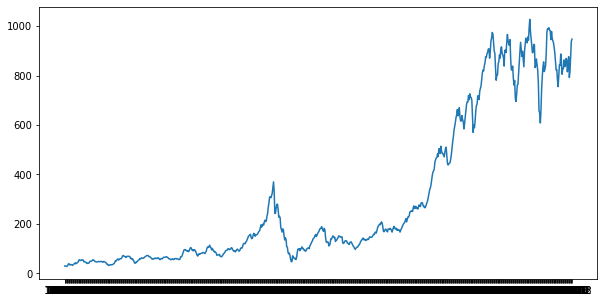

In [13]:
# plot the year-month against the daily djia mean for the month
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(DJIA_monthlyMean['yearmonth_str'], DJIA_monthlyMean['djia mean'])

In [ ]:
# plan
# push djia_df to csv
# ETL gold data csv (csv -> pd_df)
# push gold pd_df to csv
# push djia_csv and gold_csv to pd_dfs in new .ipynb
# merge djia_df 